In [66]:
%pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [50]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [56]:
# Задаем путь к данным
base_path = "/Users/andrejizvarin/Documents/___project/emotion_recognition/data"
raw_data_path = os.path.join(base_path, "raw/train")
labels_path = os.path.join(base_path, "train.csv")

In [57]:
# Загружаем метки из CSV файла
labels_df = pd.read_csv(labels_path)

In [59]:
# Посмотрим на первые несколько записей
print(labels_df.head())

   Unnamed: 0              image_path emotion
0           0     ./train/anger/0.jpg   anger
1           1     ./train/anger/1.jpg   anger
2           2    ./train/anger/10.jpg   anger
3           3   ./train/anger/100.jpg   anger
4           4  ./train/anger/1000.jpg   anger


In [60]:
# Посчитаем количество изображений для каждой эмоции
emotion_counts = labels_df["emotion"].value_counts()
print(emotion_counts)

emotion
anger        7022
neutral      6795
sad          6740
surprise     6323
happy        5955
uncertain    5927
fear         5044
disgust      3155
contempt     3085
Name: count, dtype: int64


In [62]:
# Корректировка путей к изображениям, чтобы убедиться, что они абсолютные
labels_df["image_path"] = labels_df["image_path"].apply(
    lambda x: os.path.join(raw_data_path, x.split("/")[-2], x.split("/")[-1])
)

In [67]:
# Проверка путей
pd.set_option("display.max_colwidth", None)
print(labels_df["image_path"].head())

0       /Users/andrejizvarin/Documents/___project/emotion_recognition/data/raw/train/anger/0.jpg
1       /Users/andrejizvarin/Documents/___project/emotion_recognition/data/raw/train/anger/1.jpg
2      /Users/andrejizvarin/Documents/___project/emotion_recognition/data/raw/train/anger/10.jpg
3     /Users/andrejizvarin/Documents/___project/emotion_recognition/data/raw/train/anger/100.jpg
4    /Users/andrejizvarin/Documents/___project/emotion_recognition/data/raw/train/anger/1000.jpg
Name: image_path, dtype: object


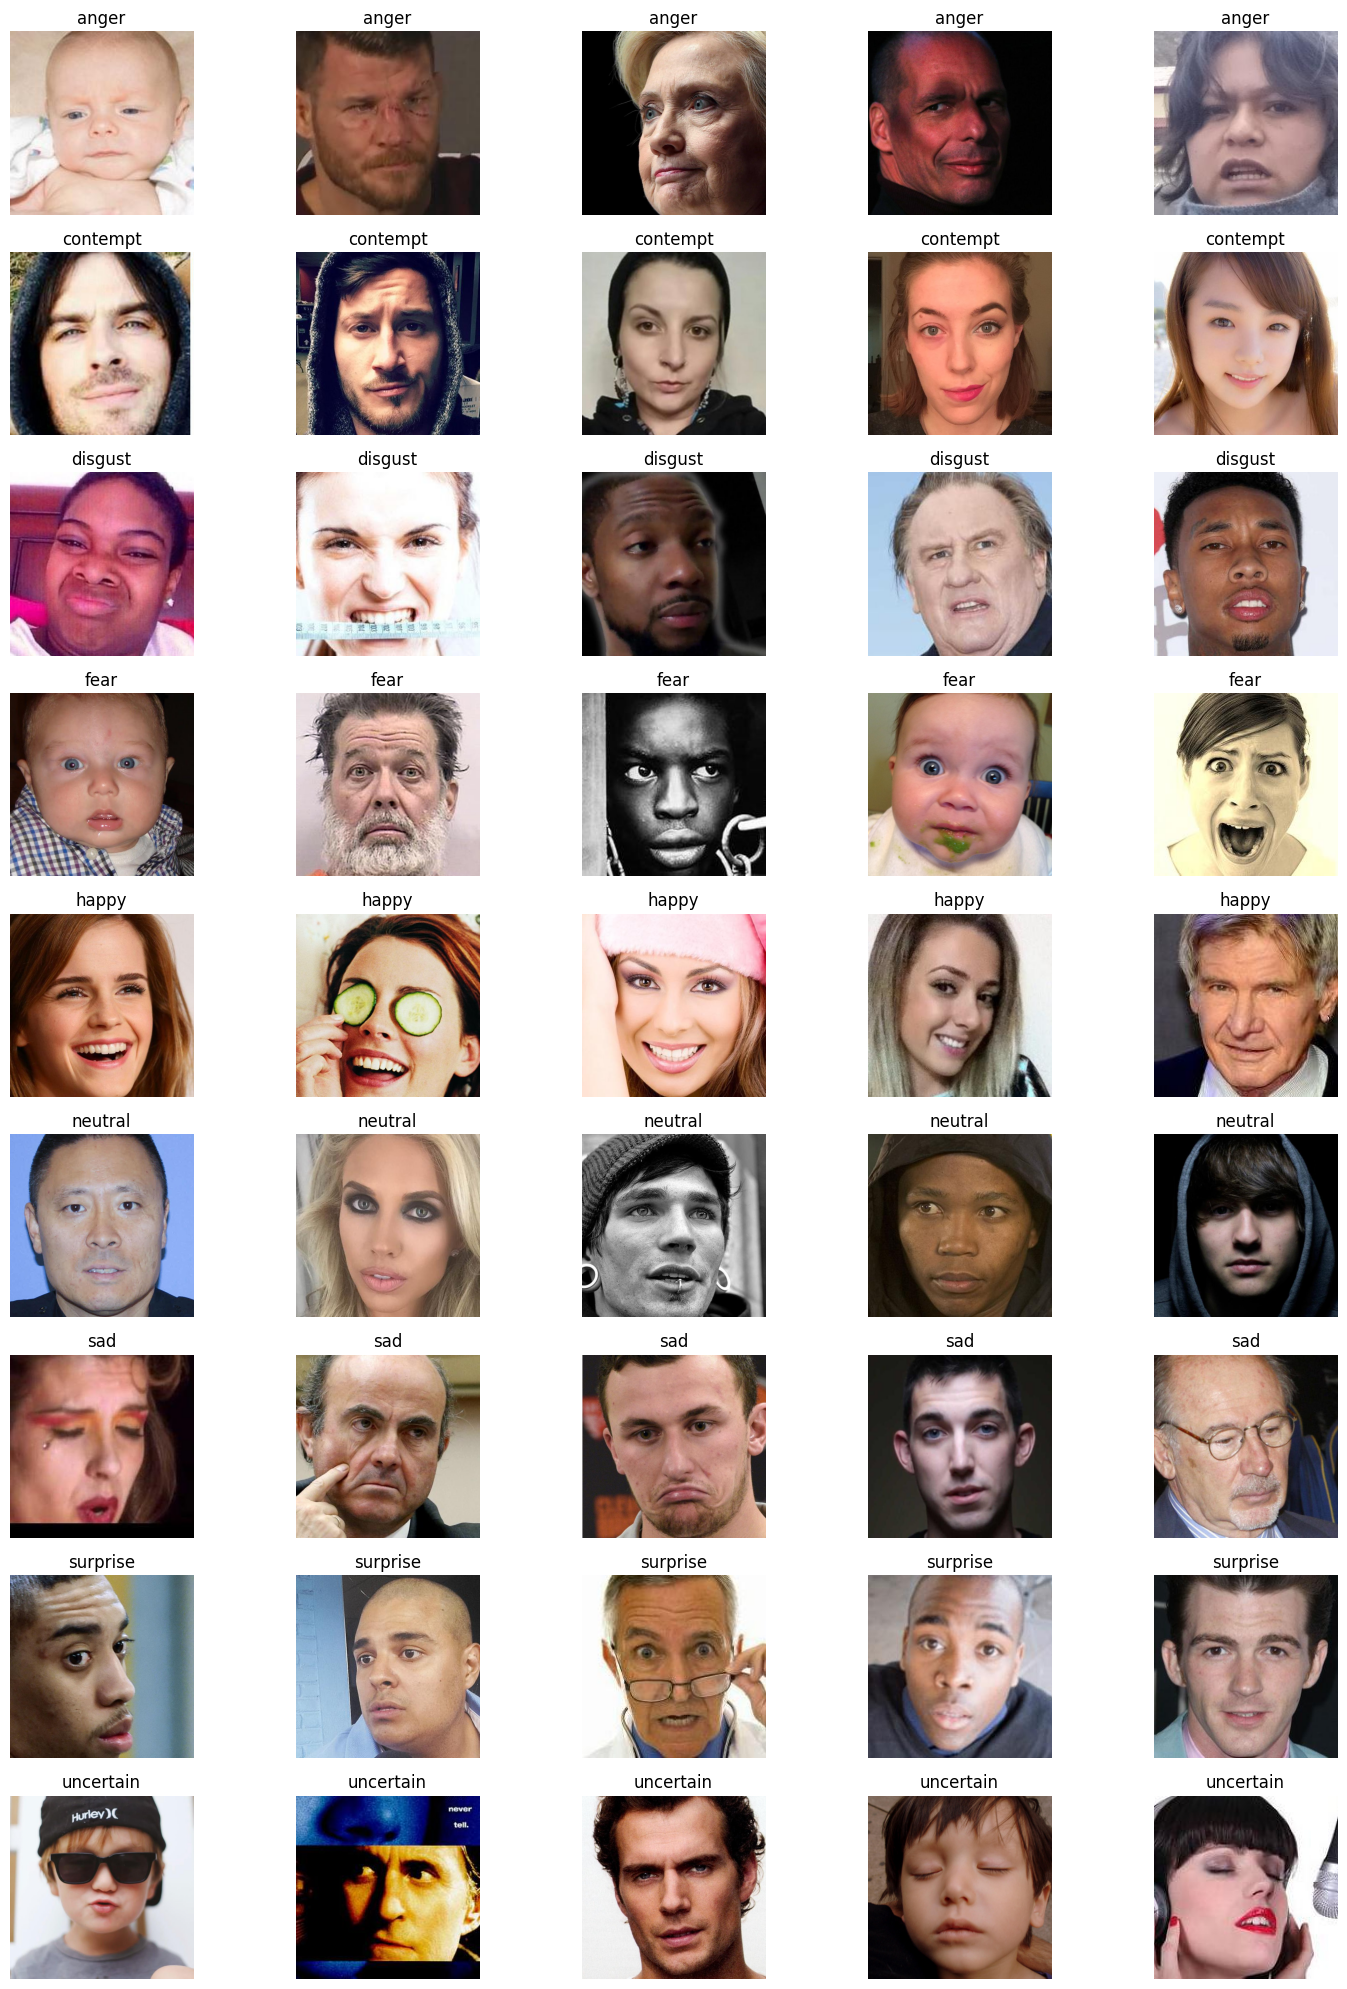

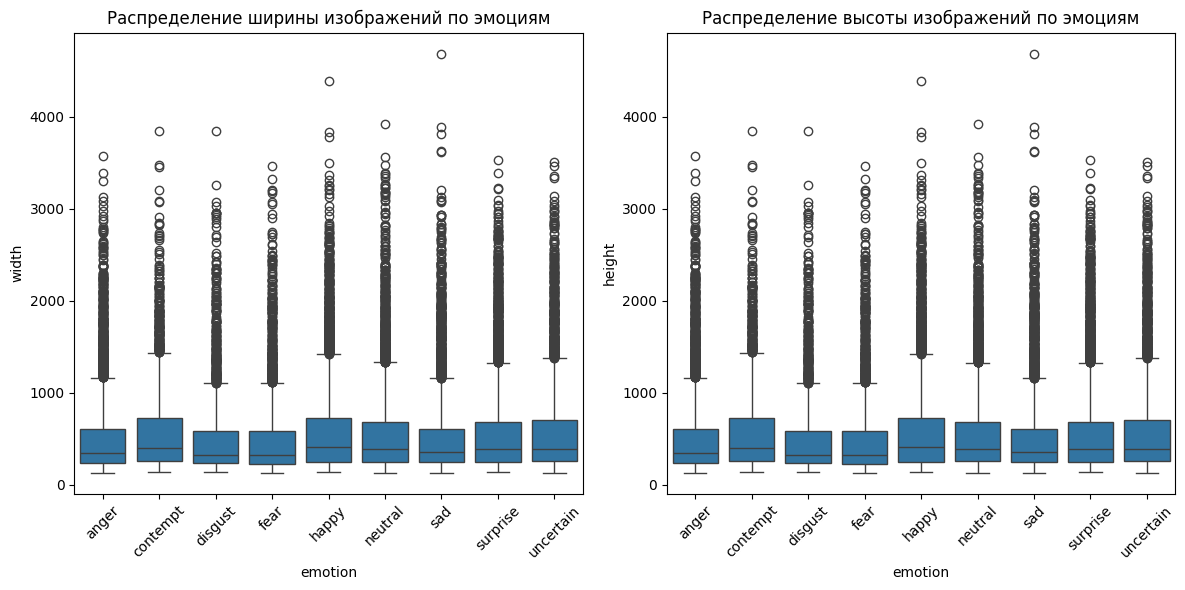

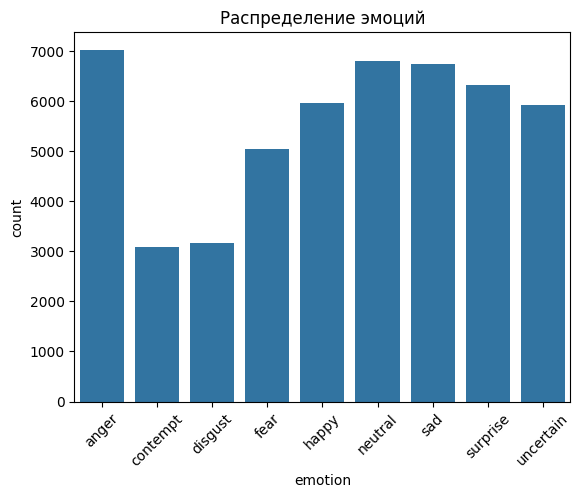

In [75]:
# Функция для отображения случайных изображений и визуализации размеров
def show_images_and_sizes(df, num_images=5):
    # Визуализация случайных изображений
    unique_emotions = df["emotion"].unique()
    fig, axes = plt.subplots(
        nrows=len(unique_emotions), ncols=num_images, figsize=(num_images * 3, 20)
    )
    for idx, emotion in enumerate(unique_emotions):
        sample_images = df[df["emotion"] == emotion].sample(num_images, random_state=1)
        for jdx, (_, row) in enumerate(sample_images.iterrows()):
            ax = axes[idx, jdx] if len(unique_emotions) > 1 else axes[jdx]
            img = Image.open(row["image_path"])
            ax.imshow(img)
            ax.axis("off")
            ax.set_title(emotion)
    plt.tight_layout()
    plt.show()

    # Извлечение и добавление размеров изображений в DataFrame
    df["width"] = df["image_path"].apply(lambda x: Image.open(x).size[0])
    df["height"] = df["image_path"].apply(lambda x: Image.open(x).size[1])

    # Визуализация распределения размеров изображений
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(x="emotion", y="width", data=df)
    plt.title("Распределение ширины изображений по эмоциям")
    plt.xticks(rotation=45)
    plt.subplot(1, 2, 2)
    sns.boxplot(x="emotion", y="height", data=df)
    plt.title("Распределение высоты изображений по эмоциям")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Вызов функции
show_images_and_sizes(labels_df)

# Визуализация распределения эмоций
sns.countplot(data=labels_df, x="emotion")
plt.title("Распределение эмоций")
plt.xticks(rotation=45)
plt.show()